<a href="https://colab.research.google.com/github/JJ-HMFIC/ML_Basic/blob/main/ML_Basic_Ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chapter 3


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
X = [1,2,3]
Y = [1,2,3]

In [ ]:
W = tf.placeholder(tf.float32)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
W = tf.placeholder(tf.float32)

In [ ]:
hypothesis = X * W # H(x) = Wx

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis-Y)) #cost/Lost function
sess = tf.Session() # 그래프의 전역변수 초기화
sess.run(tf.global_variables_initializer())

In [ ]:
W_val = []
cost_val = []

In [ ]:
# 변수 플로팅
for i in range(-30,50):
  feed_W = i*0.1
  curr_cost, curr_W = sess.run([cost,W],feed_dict={W: feed_W})
  # feed_dict는 세션 실행 중에 계산 그래프에 데이터를 공급하는 데 사용되는 메커니즘
  # feed_dict는 placeholder(W)를 실제 값(feed_W)에 매핑하는 데 사용된다
  W_val.append(curr_W)
  cost_val.append(curr_cost)
# 값이 변하는 것을 담고있음

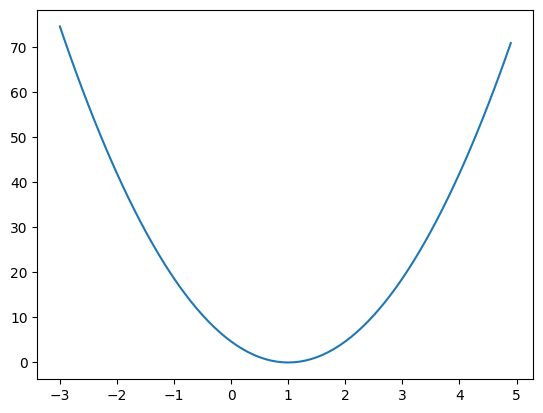

In [ ]:
plt.plot(W_val, cost_val)
plt.show()

In [ ]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

In [ ]:
W = tf.Variable(tf.random_normal([1], name='weight'))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [ ]:
hypothesis = X * W

In [ ]:
cost = tf.reduce_sum(tf.square*(hypothesis - Y))

In [ ]:
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for step in range(21):
  sess.run(update, feed_dict={X:x_data,Y:y_data})
  print(step, sess.run(cost, feed_dict={X:x_data,Y:y_data}),sess.run(W))
  #step / cost / W

0 -3.9979591 [0.14329451]
1 -2.1322446 [0.54309046]
2 -1.137197 [0.75631493]
3 -0.6065051 [0.87003464]
4 -0.32346913 [0.93068516]
5 -0.17251696 [0.96303207]
6 -0.092009224 [0.98028374]
7 -0.04907167 [0.98948467]
8 -0.026171386 [0.99439186]
9 -0.013958156 [0.997009]
10 -0.007444203 [0.9984048]
11 -0.003970504 [0.9991492]
12 -0.0021176536 [0.99954623]
13 -0.0011293093 [0.999758]
14 -0.0006022652 [0.99987096]
15 -0.00032120943 [0.99993116]
16 -0.00017134349 [0.9999633]
17 -9.1572605e-05 [0.9999804]
18 -4.8617523e-05 [0.99998957]
19 -2.592802e-05 [0.99999446]
20 -1.4026959e-05 [0.999997]


In [ ]:
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# train = optimizer.minimize(cost)

In [ ]:
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.0)
# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) # 경사하강법 메소드 사용
train = optimizer.minimize(cost)
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(20):
 print(step, sess.run(W))
 sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0


In [ ]:
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [ ]:
# Get gradients
gvs = optimizer.compute_gradients(cost, [W]) # Gradient 계산()

In [ ]:
apply_gradients = optimizer.apply_gradients(gvs)
# Gradient 계산한 값(임의 설정=gvs)을 optimizer에 반영하는 법
# gvs를 임의로 설정하면 gradient 변경 가능
# 여기선 그냥 minimize와 같음 (위의 문제와 같음)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(20):
 print(step, sess.run([gradient, W, gvs]))
 sess.run(apply_gradients)
#step / gradient / W / (gradient , W)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
